In [1]:

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# Network Graphs

In [25]:

# load graph nodes and edges
nodes = "data/artist_nodes.csv"
edges = "data/follower_edges.csv"
edgelist = pd.read_csv(edges, header=None).to_numpy().tolist()
nodelist = pd.read_csv(nodes, header=0)


In [26]:

# create a new varaible tenure
ystart = 2021
nodelist["tenure"] = ystart - nodelist["since"]

# subset the variables we want
nodelist = nodelist.iloc[:,[5,6,1]]

# bin tenure and number of designs submitted
q = [0, 0.6, 1]
labels = ["blue","red"]
tenureAttr = "tenure_cat"
subCol = "submitted_cat"

nodelist[tenureAttr] = pd.qcut(nodelist["tenure"], q=q, labels=labels)
nodelist[subCol] = pd.qcut(nodelist["submitted"], q=q, labels=labels)

# make author name as index
nodelist = nodelist.set_index(nodelist.author)

# Create empty DIRECTED graph
G = nx.DiGraph()

# Add edges
G.add_edges_from(edgelist)

# Add node attributes
for i in G.nodes:
    G.add_nodes_from([i], tenure=nodelist.loc[i][tenureAttr])
    G.add_nodes_from([i], submitted=nodelist.loc[i][subCol])

# neighbors of each node
neighbors=[]
for i in nx.neighbors(G, "DailyCollection"):
    neighbors.append(i)

# get adjacency matrix
adj_matrix = nx.incidence_matrix(G).todense()

# make node size proportional to degree
node_sz = 800
node_size= [x*node_sz for x in nx.degree_centrality(G).values()]

# make a list of colors corresponding to tenure
node_color = [nodelist.loc[i][tenureAttr] for i in G.nodes]


# of edges: 720
 # of nodes: 168
 Directed Graph: True
 Density: 0.0257



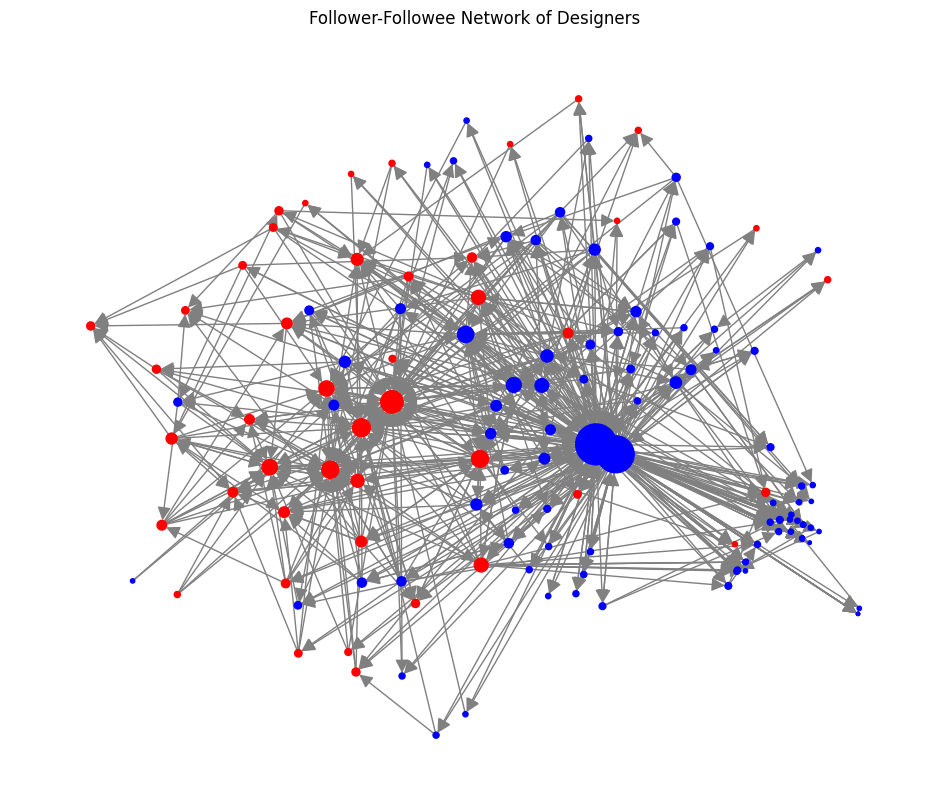

In [27]:

print(f"# of edges: {G.number_of_edges()}\n",
      f"# of nodes: {G.number_of_nodes()}\n",
      f"Directed Graph: {nx.is_directed(G)}\n",
      f"Density: {nx.density(G):.3}\n")

figure(figsize=(12, 10), dpi=100)

pos = nx.kamada_kawai_layout(G)
edge_color = "grey"
arrowsize = 20

nx.drawing.nx_pylab.draw_networkx(G,
                                  node_size=node_size,
                                  pos=pos,
                                  node_color=node_color,
                                  arrowsize=arrowsize,
                                  edge_color=edge_color,
                                  with_labels=False)
plt.title('Follower-Followee Network of Designers')
plt.axis("off")
plt.show()
